# Fazendo um projeto de identificar animais no zoológico

In [1]:
# Importando as bibliotecas necessárias

import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from itertools import combinations
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid', palette='pastel')

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importando os dados
df = pd.read_csv('zoo.csv')
df

,animal,pelos,penas,ovos,leite,salta,aquatico,predador,dentes,espinha_dorsal,respira,venenoso,nadadeiras,cauda,pernas,tipo
0,porco formigueiro,1,0,0,1,0,0,1,1,1,1,0,0,0,4,1
1,antílope,1,0,0,1,0,0,0,1,1,1,0,0,1,4,1
2,robalo,0,0,1,0,0,1,1,1,1,0,0,1,1,0,4
3,urso,1,0,0,1,0,0,1,1,1,1,0,0,0,4,1
4,javali,1,0,0,1,0,0,1,1,1,1,0,0,1,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,1,2,1
97,vespa,1,0,1,0,1,0,0,0,0,1,1,0,0,6,6
98,lobo,1,0,0,1,0,0,1,1,1,1,0,0,1,4,1
99,verme,0,0,1,0,0,0,0,0,0,1,0,0,0,0,7


In [3]:
df.shape

(101, 16)

In [4]:
# Os tipos do df

tipo = {1:'mamifero',2:'passaro',3:'reptil',
       4:'peixe', 5:'anfibio', 6:'inseto',
       7:'invertebrado'}

In [5]:
# Criando uma lista das possiveis combinações entre características
# e fazendo uma comparação de como as combinações aparecem juntos

comb_var = list (combinations(df.columns[1:-2],2))
result = []

for c in comb_var:
    if c[0] != c[1]:
        sim = sum((df[c[0]] != df[c[1]]))/len(df)
        result.append((c[0],c[1],sim))

In [6]:
# Criando um DF com os dados das combinações
# e organizando para ver quais combinações mais aparecem juntas
df_res = pd.DataFrame(result, columns=['Var1','Var2','Metrica'])
df_res.sort_values(by=['Metrica'])

,Var1,Var2,Metrica
2,pelos,leite,0.059406
71,espinha_dorsal,cauda,0.099010
14,penas,salta,0.118812
55,aquatico,nadadeiras,0.188119
36,leite,dentes,0.217822
...,...,...,...
69,espinha_dorsal,venenoso,0.821782
53,aquatico,respira,0.831683
73,respira,nadadeiras,0.881188
1,pelos,ovos,0.910891


In [7]:
# Criando um novo DF apenas com as features

x = df.iloc[:,1:-1]
x.head()

,pelos,penas,ovos,leite,salta,aquatico,predador,dentes,espinha_dorsal,respira,venenoso,nadadeiras,cauda,pernas
0,1,0,0,1,0,0,1,1,1,1,0,0,0,4
1,1,0,0,1,0,0,0,1,1,1,0,0,1,4
2,0,0,1,0,0,1,1,1,1,0,0,1,1,0
3,1,0,0,1,0,0,1,1,1,1,0,0,0,4
4,1,0,0,1,0,0,1,1,1,1,0,0,1,4


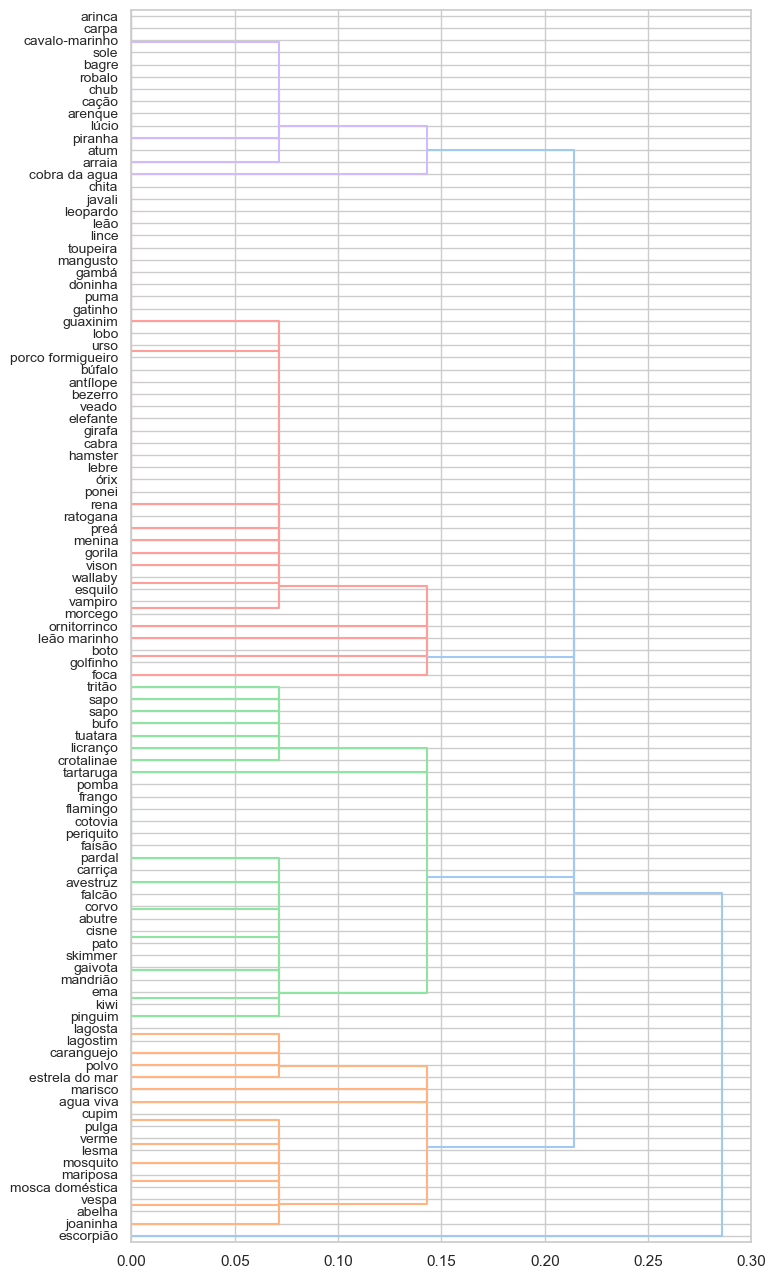

In [8]:
# Fazendo um agrupamento hierárquico

z = linkage(x, metric='hamming')
plt.figure(figsize=(8,16))
dendrogram(z, truncate_mode=None, labels=list(df.animal),
          orientation='right',
          leaf_font_size=10,leaf_rotation=0,);

In [9]:
fcluster(z,.1,criterion='distance')

array([ 9,  9, 13,  9,  9,  9,  9, 13, 13,  9,  9,  5, 13,  3,  2,  2,  5,
        9, 13,  8,  5,  5,  9,  5,  1,  6,  6,  9,  9,  9,  1,  9,  9,  5,
       13,  9,  9,  5, 13,  1,  1,  5,  1,  5,  9,  9,  2,  9,  9,  9,  9,
        1,  6,  2,  9,  9,  5,  5,  5,  5, 13, 13,  6, 10,  9,  9,  8,  9,
        9,  9,  9,  5, 15, 13, 12, 11, 14,  4,  5,  5,  6,  1, 13,  5,  9,
        2, 13,  5,  1,  6,  7,  6, 13,  9,  9,  5,  9,  1,  9,  1,  5],
      dtype=int32)

# Fazendo um projeto de agrupamento de clientes de varejo

In [10]:
# Importando a ferramenta product e carregando os dados

from itertools import product
df2 = pd.read_csv('dados_clientes.csv')
df2

,canal,regiao,fresco,leite,mercearia,congelado,limpeza,iguaria
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


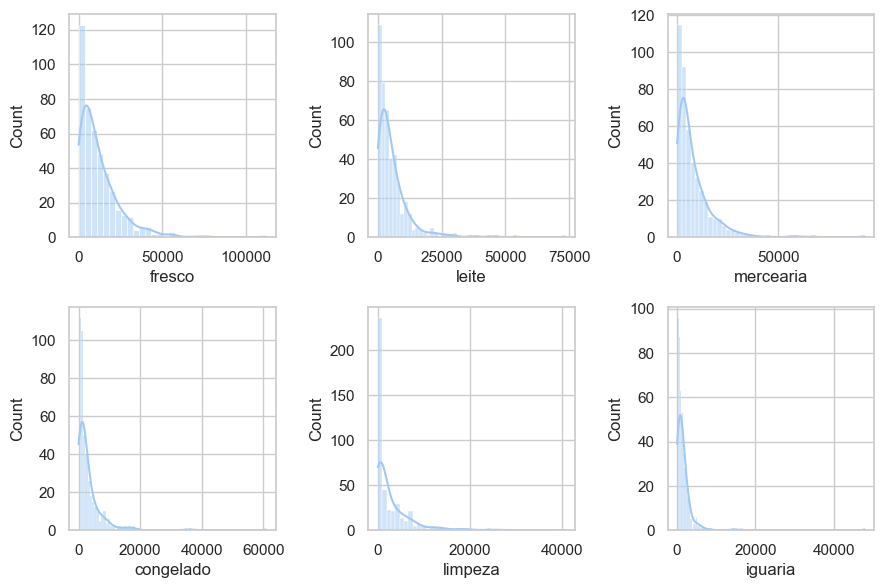

In [11]:
# Plotando os dados para entender a distribuição de cada
# uma das variáveis da base de dados

fig, axs = plt.subplots(2,3,figsize=(9,6))

pos = list(product(range(2),range(3)))

for i, c in enumerate(df2.columns[2:]):
    sns.histplot(data=df2, x=c, kde=True, ax=axs[pos[i]])

plt.tight_layout()
plt.show()

In [12]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
canal,440.0,1.322727,0.468052,1.0,1.00,1.0,2.00,2.0
regiao,440.0,2.543182,0.774272,1.0,2.00,3.0,3.00,3.0
fresco,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
leite,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0
mercearia,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0
congelado,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
limpeza,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0
iguaria,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


In [13]:
# Verificando os gastos de clientes que gastaram mais em iguarias
df2[df2.iguaria >2000].sort_values(by=['iguaria'])

,canal,regiao,fresco,leite,mercearia,congelado,limpeza,iguaria
300,2,2,16448,6243,6360,824,2662,2005
61,2,3,35942,38369,59598,3254,26701,2017
281,2,3,12238,7108,6235,1093,2328,2079
430,1,3,3097,4230,16483,575,241,2080
9,2,3,6006,11093,18881,1159,7425,2098
...,...,...,...,...,...,...,...,...
181,1,3,112151,29627,18148,16745,4948,8550
87,1,3,43265,5025,8117,6312,1579,14351
71,1,3,18291,1266,21042,5373,4173,14472
23,2,3,26373,36423,22019,5154,4337,16523


In [14]:
# Total gasto por cliente somando todas as categorias
df2.iloc[:,2:].sum(axis=1)

0      34112
1      33266
2      36610
3      27381
4      46100
       ...  
435    73302
436    48372
437    77407
438    17834
439     7589
Length: 440, dtype: int64

In [15]:
df2_new = df2.copy()
df2_new['total'] = df2.iloc[:,2:].sum(axis=1)
df2_new.head()

,canal,regiao,fresco,leite,mercearia,congelado,limpeza,iguaria,total
0,2,3,12669,9656,7561,214,2674,1338,34112
1,2,3,7057,9810,9568,1762,3293,1776,33266
2,2,3,6353,8808,7684,2405,3516,7844,36610
3,1,3,13265,1196,4221,6404,507,1788,27381
4,2,3,22615,5410,7198,3915,1777,5185,46100


In [16]:
# Dividindo o valor de cada coluna pelo total, para ver
# o gasto percentual de cada cliente em cada setor.

for c in df2_new.columns[2:8]:
    df2_new[f'perc_{c}'] = df2_new[c]/df2_new['total']

In [17]:
df2_new

,canal,regiao,fresco,leite,mercearia,congelado,limpeza,iguaria,total,perc_fresco,perc_leite,perc_mercearia,perc_congelado,perc_limpeza,perc_iguaria
0,2,3,12669,9656,7561,214,2674,1338,34112,0.371394,0.283068,0.221652,0.006273,0.078389,0.039224
1,2,3,7057,9810,9568,1762,3293,1776,33266,0.212139,0.294896,0.287621,0.052967,0.098990,0.053388
2,2,3,6353,8808,7684,2405,3516,7844,36610,0.173532,0.240590,0.209888,0.065692,0.096039,0.214258
3,1,3,13265,1196,4221,6404,507,1788,27381,0.484460,0.043680,0.154158,0.233885,0.018516,0.065301
4,2,3,22615,5410,7198,3915,1777,5185,46100,0.490564,0.117354,0.156139,0.084924,0.038547,0.112473
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204,73302,0.405214,0.164402,0.218643,0.179190,0.002483,0.030067
436,1,3,39228,1431,764,4510,93,2346,48372,0.810965,0.029583,0.015794,0.093236,0.001923,0.048499
437,2,3,14531,15488,30243,437,14841,1867,77407,0.187722,0.200085,0.390701,0.005645,0.191727,0.024119
438,1,3,10290,1981,2232,1038,168,2125,17834,0.576988,0.111080,0.125154,0.058203,0.009420,0.119154


In [18]:
# Criando um novo DF com os percentuais

df2_perc = df2_new.iloc[:,-6:]
df2_perc

,perc_fresco,perc_leite,perc_mercearia,perc_congelado,perc_limpeza,perc_iguaria
0,0.371394,0.283068,0.221652,0.006273,0.078389,0.039224
1,0.212139,0.294896,0.287621,0.052967,0.098990,0.053388
2,0.173532,0.240590,0.209888,0.065692,0.096039,0.214258
3,0.484460,0.043680,0.154158,0.233885,0.018516,0.065301
4,0.490564,0.117354,0.156139,0.084924,0.038547,0.112473
...,...,...,...,...,...,...
435,0.405214,0.164402,0.218643,0.179190,0.002483,0.030067
436,0.810965,0.029583,0.015794,0.093236,0.001923,0.048499
437,0.187722,0.200085,0.390701,0.005645,0.191727,0.024119
438,0.576988,0.111080,0.125154,0.058203,0.009420,0.119154


In [19]:
# Importando o KMeans e para a clusterização
from sklearn.cluster import KMeans

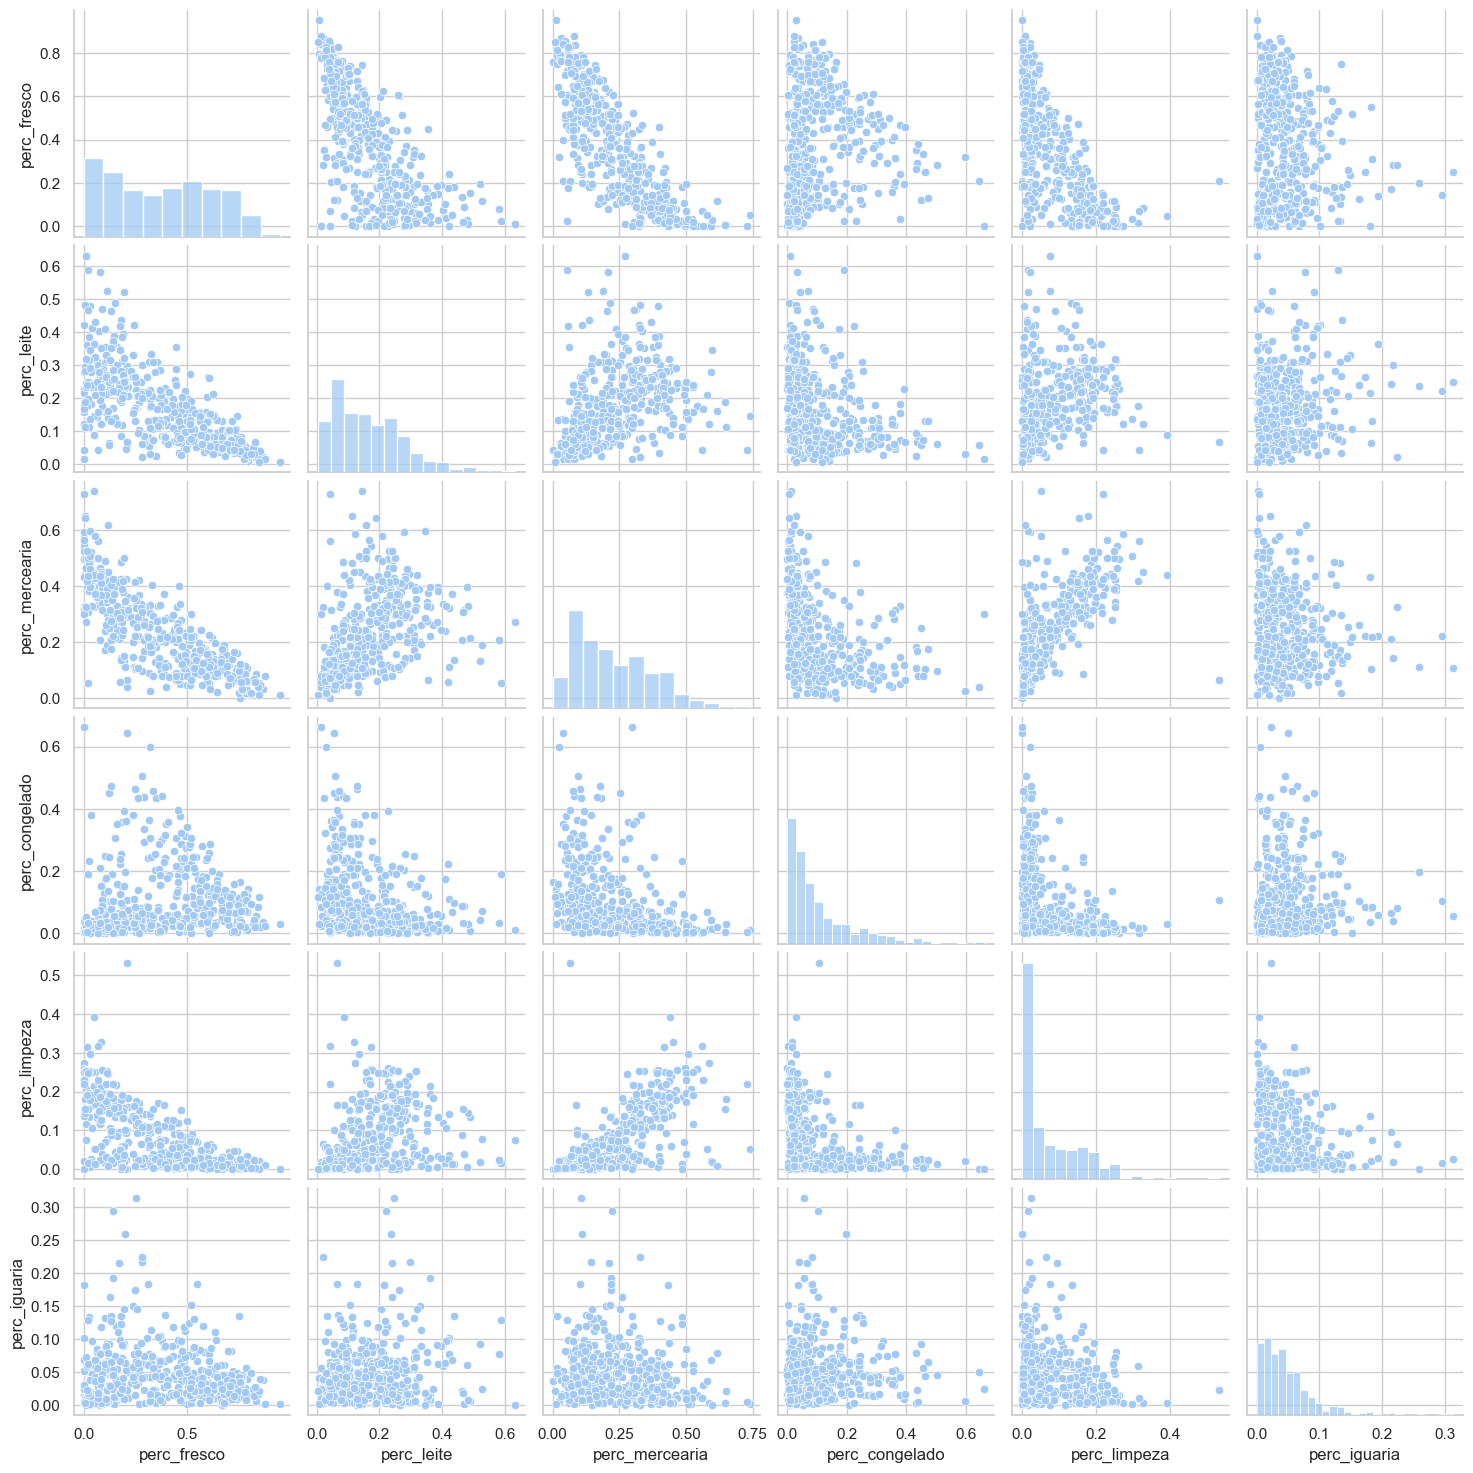

In [20]:
# Plotando a interação entre as variáveis
sns.pairplot(df2_perc)

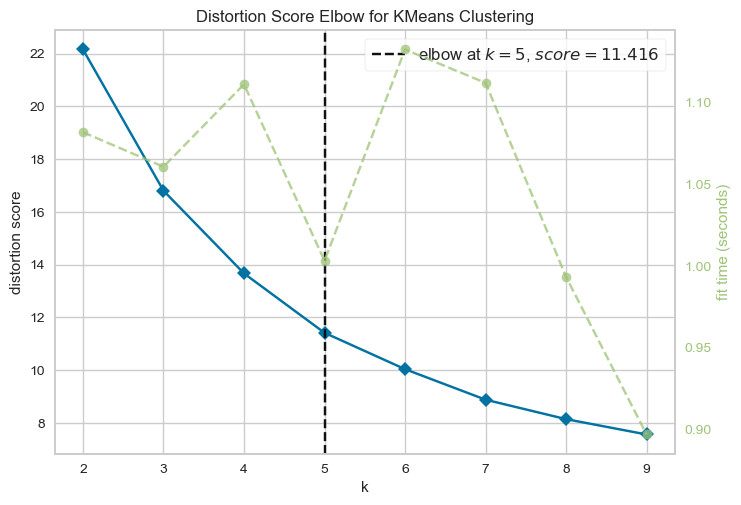

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [21]:
# Verificando o melhor valor de K para o KMeans

from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10),metric='distortion', timings = True)
visualizer.fit(df2_perc)
visualizer.show()

In [22]:
# Pelo método do cotovelo, percebe-se que o melhor valor
# de k para o KMeans é de 5. Usando esse valor para o algoritmo

kmeans = KMeans(n_clusters=5, random_state=3, n_init='auto').fit(df2_perc)
labels = kmeans.labels_
df2_perc['cluster'] = labels

In [23]:
# Verificando a média de gastos por cluster
df2_perc.groupby('cluster').mean()

,perc_fresco,perc_leite,perc_mercearia,perc_congelado,perc_limpeza,perc_iguaria
cluster,,,,,,
0,0.399785,0.170213,0.243198,0.057114,0.075121,0.054570
1,0.676736,0.076751,0.100398,0.092001,0.018154,0.035960
2,0.089974,0.223574,0.434159,0.036377,0.179088,0.036828
3,0.374978,0.101027,0.132208,0.320761,0.023751,0.047274
4,0.141919,0.357629,0.248495,0.095108,0.068779,0.088070


In [24]:
# Fazendo a decomposição da base de dados para 2 dimensões
from sklearn.decomposition import PCA

In [25]:
# Fazendo a visualização em 2D
pca = PCA(n_components=2)
pca_features = pca.fit_transform(df2_perc)
print(pca.explained_variance_ratio_)

[0.94471832 0.04119395]


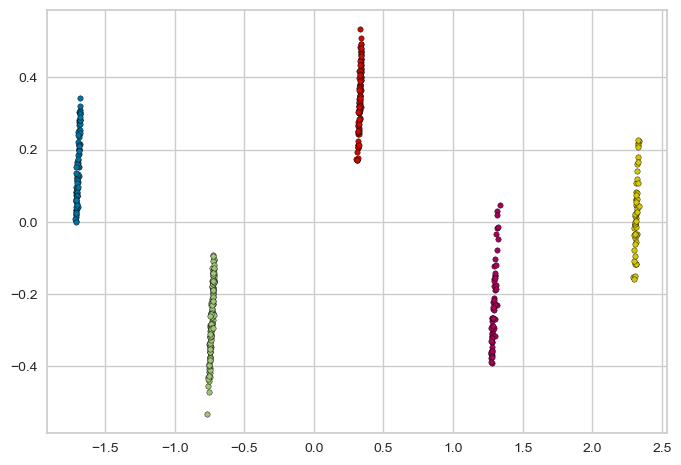

In [26]:
# Plotando os dados obtidos com o PCA, com a separação dos
# clusters feitas pelo KMeans

for n in range(5):
    plt.scatter(pca_features[labels==n,0], pca_features[labels==n,1],edgecolors='black',s=15)

plt.plot();

# Clusterização de Imagens Médicas

In [27]:
# Importando as bibliotecas necessárias

import os
import shutil
import numpy as np
from scipy.spatial import ConvexHull
import cv2
import glob
import csv

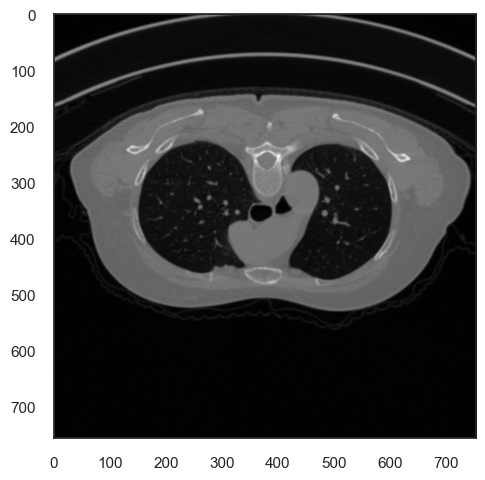

In [28]:
# Verificando a imagem que será analisada
sns.set_theme(style='white', palette='pastel')
exam_path = 'slice001.png'
image = cv2.imread(exam_path)
plt.imshow(image)

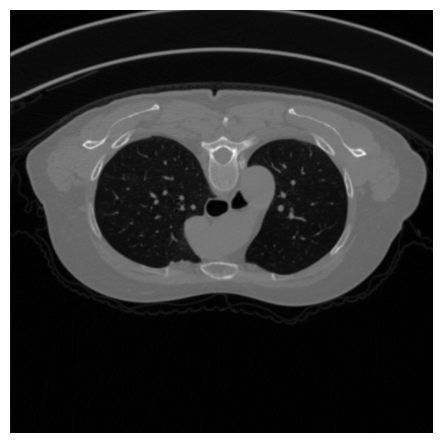

In [29]:
# Tratando a imagem com openCV

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap = "gray");
plt.axis('off');

(-0.5, 753.5, 755.5, -0.5)

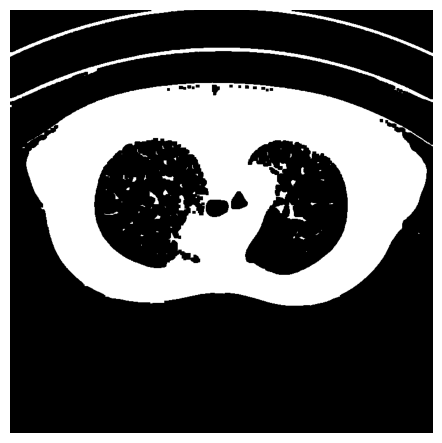

In [30]:
# Transformando a imagem para que tenha apenas tons
# de branco e tons de preto

_ , mask = cv2.threshold(gray, 20, 255, cv2.THRESH_BINARY)
mask = cv2.erode(mask, np.ones((5, 5), np.uint8))
plt.imshow(mask, cmap = "gray")
plt.axis('off')

In [31]:
# Salvando a imagem modificada em um arquivo

cv2.imwrite('thresholding.png',
            cv2.hconcat([image, np.stack((mask, mask, mask), axis=2)]));

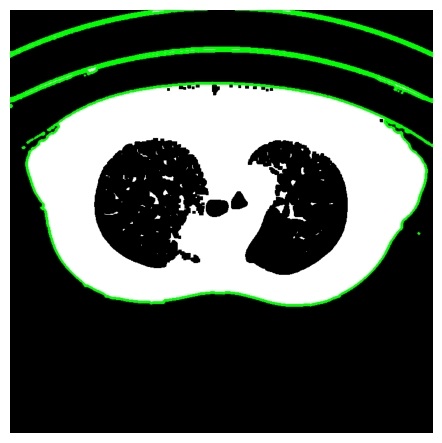

In [32]:
# Encontrando os contornos externos da imagem

contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

contours_img_before_filtering = mask.copy()
contours_img_before_filtering = cv2.cvtColor(contours_img_before_filtering, cv2.COLOR_GRAY2BGR)
cv2.drawContours(contours_img_before_filtering, contours, -1, (0, 255, 0), 3)
plt.imshow(contours_img_before_filtering)
plt.axis('off');

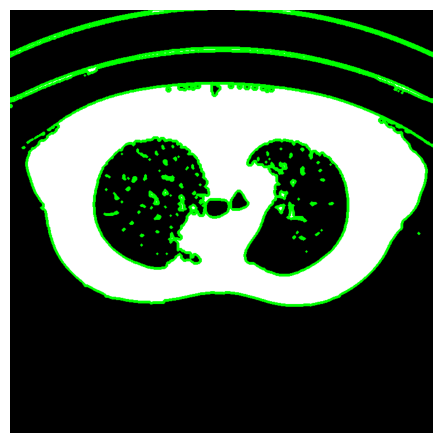

In [33]:
# Encontrando todos os contornos da imagem

contours, _ = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

contours_img_before_filtering = mask.copy()
contours_img_before_filtering = cv2.cvtColor(contours_img_before_filtering, cv2.COLOR_GRAY2BGR)
cv2.drawContours(contours_img_before_filtering, contours, -1, (0, 255, 0), 3)
plt.imshow(contours_img_before_filtering)
plt.axis('off');

In [34]:
# Controlando a detecção do tamanho
# dos contornos baseado na área do contorno

filtered_contours = []
df_mean_color = pd.DataFrame()
for idx, contour in enumerate(contours):
    area = int(cv2.contourArea(contour))

    sz=4000
    if (area > sz) & (area < 20*sz):
        filtered_contours.append(contour)
        # Conseguindo a cor média de cada contorno:
        masked = np.zeros_like(image[:, :, 0])  
        cv2.drawContours(masked, [contour], 0, 255, -1)
        
        # Salvando os valores médios em RGB dos contornos em um DF
        B_mean, G_mean, R_mean, _ = cv2.mean(image, mask=masked)
        df = pd.DataFrame({'B_mean': B_mean, 'G_mean': G_mean, 'R_mean': R_mean}, index=[idx])
        df_mean_color = pd.concat([df_mean_color, df])

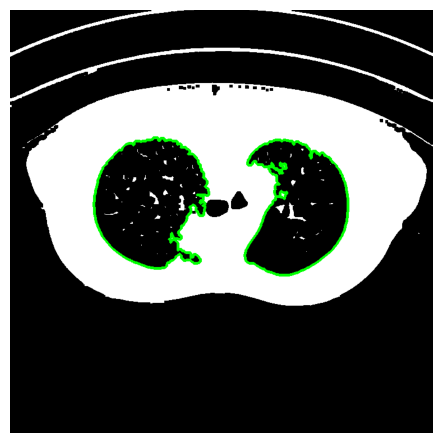

In [35]:
# Verificando as áreas selecionadas
contours_img_after_filtering = mask.copy()
contours_img_after_filtering = cv2.cvtColor(contours_img_after_filtering, cv2.COLOR_GRAY2BGR)
cv2.drawContours(contours_img_after_filtering, tuple(filtered_contours), -1, (0, 255, 0), 3)

plt.imshow(contours_img_after_filtering)
plt.axis('off')

cv2.imwrite('./data/medical/contours.png', cv2.hconcat([contours_img_before_filtering, contours_img_after_filtering]));


In [36]:
# Fazendo um KMeans para as duas áreas encontradas

km = KMeans(n_clusters=2)
df_mean_color['label'] = km.fit_predict(df_mean_color)

In [37]:
# Fazendo uma função para segmentar a imagem

def draw_segmented_objects(image, contours, label_cnt_idx, bubbles_count):
    mask = np.zeros_like(image[:, :, 0])
    cv2.drawContours(mask, [contours[i] for i in label_cnt_idx], -1, (255), -1)
    masked_image = cv2.bitwise_and(image, image, mask=mask)
    masked_image = cv2.putText(masked_image, f'{bubbles_count} bubbles', (200, 1200), cv2.FONT_HERSHEY_SIMPLEX,
                        fontScale = 3, color = (255, 255, 255), thickness = 10, lineType = cv2.LINE_AA)
    return masked_image

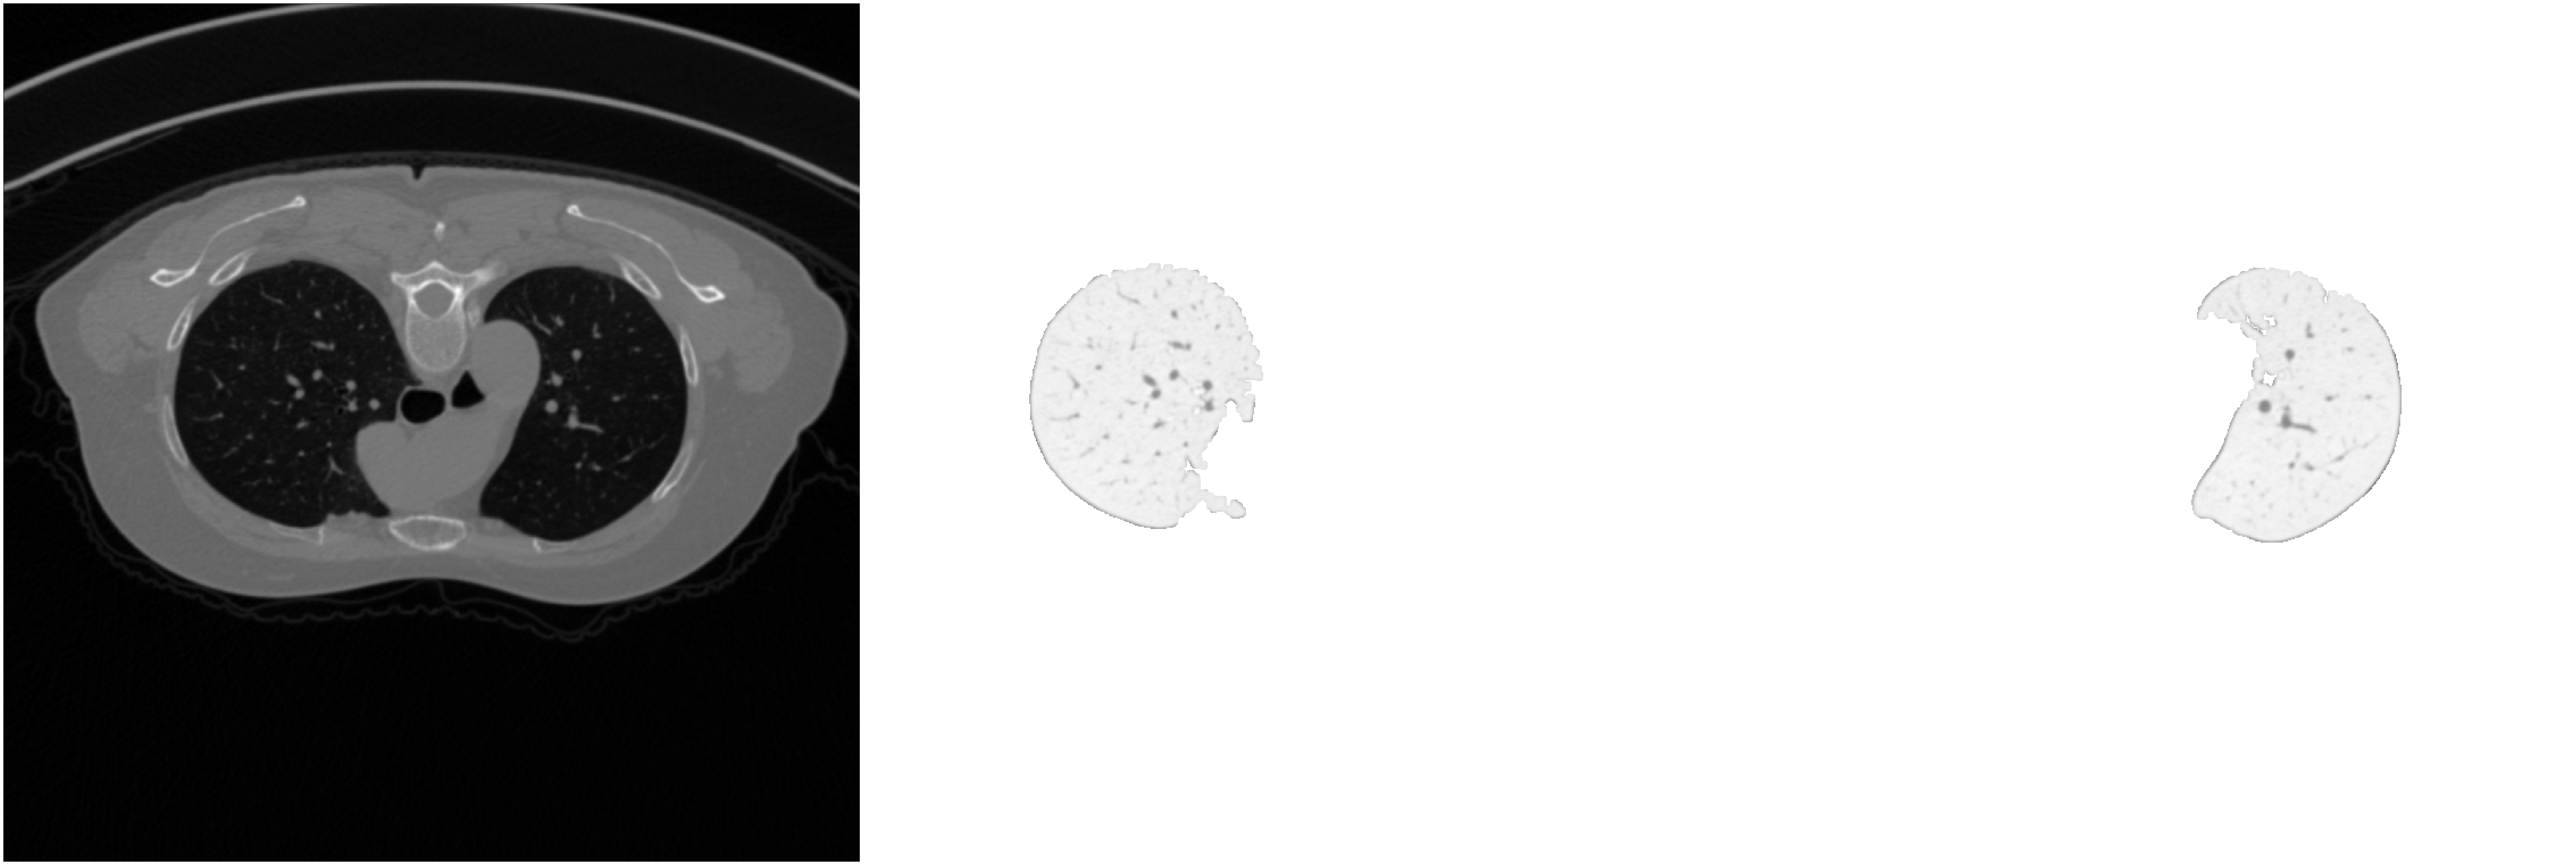

In [38]:
# Plotando a imagem segmentada, separando as duas áreas
# encontradas

img = image.copy()
plt.figure(figsize = (100,40))
for label, df_grouped in df_mean_color.groupby('label'):
    bubbles_amount = len(df_grouped)
    masked_image = draw_segmented_objects(image, contours, df_grouped.index, bubbles_amount)
    temp = np.invert(masked_image)
    img = cv2.hconcat([img, temp])
    

cv2.imwrite('./data/medical/color_segmentation.png', img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB) )
plt.axis('off');

# Fazendo uma Clusterização de Notícias

In [39]:
# Importando os dados

df3 = pd.read_csv('bbc-text.csv')
df3.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [40]:
df3.category.value_counts()

sport            511
business         510
politics         417
tech             401
entertainment    386
Name: category, dtype: int64

In [41]:
# Listando o total de notícias de cada categoria
total_categorias = df3.category.value_counts().values
total_categorias

array([511, 510, 417, 401, 386], dtype=int64)

In [42]:
# Importando a biblioteca e instanciando o TDIDF para
# verificar a frequência de palavras nos textos

from sklearn.feature_extraction.text import TfidfVectorizer
from time import time

vectorizer = TfidfVectorizer(
    max_df=0.5,
    min_df=5,
    stop_words="english",
)

In [43]:
# Aplicando o algoritmo a base de dados

t0 = time()
x_tfidf = vectorizer.fit_transform(df3.text)
print(f"Vetorização completa em {time() - t0:.3f} s")
print(f"Observacoes: {x_tfidf.shape[0]}, Features: {x_tfidf.shape[1]}")

Vetorização completa em 0.963 s
Observacoes: 2225, Features: 9136


In [45]:
# Verificando a porcentagem dos valores da matriz
# que são realmente diferentes de zero

print(f"{x_tfidf.nnz / np.prod(x_tfidf.shape):.3f}")

0.014


In [47]:
# Verificando como ficaria uma clusterização com Kmeans
# na base de dados, sem tratar os valores zerados

for seed in range(5):
    kmeans = KMeans(
        n_clusters=5,
        max_iter=100,
        n_init=1,
        random_state=seed,
    ).fit(x_tfidf)
    cluster_ids, cluster_sizes = np.unique(kmeans.labels_, return_counts=True)
    print(f"Número de elementos em cada cluster: {cluster_sizes}")
print()
print(
    "Número de documentos em cada cluster real: "
    f"{total_categorias}"
)

Número de elementos em cada cluster: [405 561 353 396 510]
Número de elementos em cada cluster: [339 377 723 270 516]
Número de elementos em cada cluster: [515 140 893 364 313]
Número de elementos em cada cluster: [829 373 154 499 370]
Número de elementos em cada cluster: [271 822 491 272 369]

Número de documentos em cada cluster real: [511 510 417 401 386]


In [48]:
# Utilizando o processo de LSA para diminuir o número
# de zeros na matriz, para então utilizado o TruncateSVD

from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn import metrics


lsa = make_pipeline(TruncatedSVD(n_components=100), Normalizer(copy=False))
t0 = time()
x_lsa = lsa.fit_transform(x_tfidf)
explained_variance = lsa[0].explained_variance_ratio_.sum()

print(f"LSA concluido em {time() - t0:.3f} s")
print(f"Variação explicado do SVD: {explained_variance * 100:.1f}%")

LSA concluido em 0.834 s
Variação explicado do SVD: 26.3%


In [49]:
# Fazendo uma análise de silhoueta na base de dados após
# o LSA para verificar o melhor valor de k para o KMeans

for i in range(2,10):
    kmeans_model = KMeans(n_clusters=i, random_state=42).fit(x_lsa)
    labels = kmeans_model.labels_
    print(f"k={i} - silhueta={metrics.silhouette_score(x_lsa, labels, metric='euclidean'):.3f}")
    print(f"k={i} - rand_index={metrics.adjusted_rand_score(df3.category.values, labels):.3f}")
    print(20*' * ')

k=2 - silhueta=0.041
k=2 - rand_index=0.314
 *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  * 
k=3 - silhueta=0.050
k=3 - rand_index=0.568
 *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  * 
k=4 - silhueta=0.059
k=4 - rand_index=0.644
 *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  * 
k=5 - silhueta=0.070
k=5 - rand_index=0.903
 *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  * 
k=6 - silhueta=0.072
k=6 - rand_index=0.870
 *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  * 
k=7 - silhueta=0.075
k=7 - rand_index=0.775
 *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  * 
k=8 - silhueta=0.082
k=8 - rand_index=0.725
 *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  * 
k=9 - silhueta=0.081
k=9 - rand_index=0.618
 *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  * 


In [50]:
# Fazendo KMeans para o valor de k=5, que obteve
# o maior rand_index

kmeans = KMeans(
    n_clusters=5,
    max_iter=100,
    n_init=1,
    random_state=seed,
).fit(x_lsa)

labels = kmeans.labels_

In [51]:
# Verificando quais são as palavras que estão mais
# impactando cada um dos grupos

original_space_centroids = lsa[0].inverse_transform(kmeans.cluster_centers_)
order_centroids = original_space_centroids.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()

for i in range(5):
    print(f"Cluster {i}: ", end="")
    for ind in order_centroids[i, :10]:
        print(f"{terms[ind]} ", end="")
    print()

Cluster 0: film best band music tv awards star award actor album 
Cluster 1: game england win cup club play match players team season 
Cluster 2: people mobile technology users software digital computer net music games 
Cluster 3: mr labour government election blair party minister people brown howard 
Cluster 4: company growth market sales shares firm bank economy oil mr 
